# Distributions of various calibrated FUSE parameters and metrics 
Four FUSE instances. 

# Purpose

1. Perturbation bounds for DELSA
2. Identifying best parameter set for event modeling based on KGE scores


In [24]:
import glob, os
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

In [25]:
outdir = '/gpfs/fs1/work/manab/ff/islandpark/allout/calib100'  # Where the 100 ens * 4 model runs are stored

prmsparam = sorted(glob.glob(outdir + '/*_111_para_best.nc'))
hechmsparam = sorted(glob.glob(outdir + '/*_222_para_best.nc'))
vicparam = sorted(glob.glob(outdir + '/*_333_para_best.nc'))
sacsmaparam = sorted(glob.glob(outdir + '/*_444_para_best.nc'))

# List of all netCDF variables and long_names

In [26]:
parlist = list(xr.open_dataset(prmsparam[0])) #Get a list of all netCDF variables


#Comes from model run logs
prmsparlist = ['RFERR_MLT', 'FRCHZNE', 'FRACTEN', 'MAXWATR_1', 'FRACLOWZ', 'MAXWATR_2','QB_PRMS', 'RTFRAC1', 
            'PERCRTE', 'PERCEXP', 'IFLWRTE', 'SAREAMAX', 'TIMEDELAY', 'MBASE', 'MFMAX', 
            'MFMIN', 'PXTEMP', 'OPG', 'LAPSE'] 
hechmsparlist = ['RFERR_MLT', 'FRACTEN', 'MAXWATR_1', 'MAXWATR_2', 'QB_PRMS', 'PERCRTE', 'PERCEXP', 
                 'AXV_BEXP', 'TIMEDELAY', 'MBASE', 'MFMAX', 'MFMIN', 'PXTEMP', 'OPG', 'LAPSE']
vicparlist = ['RFERR_MLT', 'FRACTEN', 'MAXWATR_1', 'MAXWATR_2', 'BASERTE', 'QB_POWR', 'RTFRAC1', 'PERCRTE', 
              'PERCEXP', 'AXV_BEXP', 'TIMEDELAY', 'MBASE', 'MFMAX', 'MFMIN', 'PXTEMP', 'OPG', 'LAPSE']
sacsmaparlist = ['RFERR_MLT', 'FRACTEN', 'MAXWATR_1', 'PERCFRAC', 'FPRIMQB', 'MAXWATR_2', 'QBRATE_2A',
                 'QBRATE_2B', 'SACPMLT', 'SACPEXP', 'IFLWRTE', 'SAREAMAX', 'TIMEDELAY', 'MBASE', 'MFMAX',
                 'MFMIN', 'PXTEMP', 'OPG', 'LAPSE']

In [27]:
def descExtract(ncdf):
    '''Extracts netCDF variable descriptions 
    
    ncdf: Example netCDF file output from FUSE
    '''
    nctemp = xr.open_dataset(ncdf) #Get a list of all netCDF variables
    pardesclist = []
    for var in nctemp.variables.values():
        
        pardesc = var.attrs.get('long_name')
        pardesclist.append(pardesc)
    return(pardesclist)
    
pardesclist = descExtract(ncdf = prmsparam[0])

In [28]:
def parExtract(nclist, parlist):
    '''Extracts a variable from a list of netCDF files
    
    nclist: List of netCDF files
    ncpar: Variable which you want to extract values
    '''
    #ncdat = []
    ncdat = pd.DataFrame([])
    for count, value in enumerate(nclist):
        ncout = xr.open_dataset(value).to_dataframe()
        parval = ncout[parlist]
        ncdat = ncdat.append(parval)
        #
    return(ncdat)

# FUSE (PRMS)

        RFERR_MLT     FRCHZNE     FRACTEN   MAXWATR_1    FRACLOWZ  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     1.000312    0.436551    0.597354  422.112579    0.518695   
std      0.000291    0.221474    0.325390   99.331940    0.255910   
min      1.000001    0.071948    0.063912   68.245094    0.055336   
25%      1.000039    0.278741    0.242242  384.314476    0.331440   
50%      1.000239    0.392759    0.657539  456.099319    0.492317   
75%      1.000499    0.565884    0.946054  498.983185    0.756652   
max      1.000946    0.943972    0.949952  499.965454    0.947527   

         MAXWATR_2     QB_PRMS     RTFRAC1     PERCRTE     PERCEXP  \
count   100.000000  100.000000  100.000000  100.000000  100.000000   
mean   2772.826172    0.018353    0.476414  485.578705    6.215000   
std    1369.757690    0.046892    0.190454  297.716492    6.314184   
min      83.739182    0.001021    0.073259   14.064138    1.000239   
25%    1889.527802    0.0023

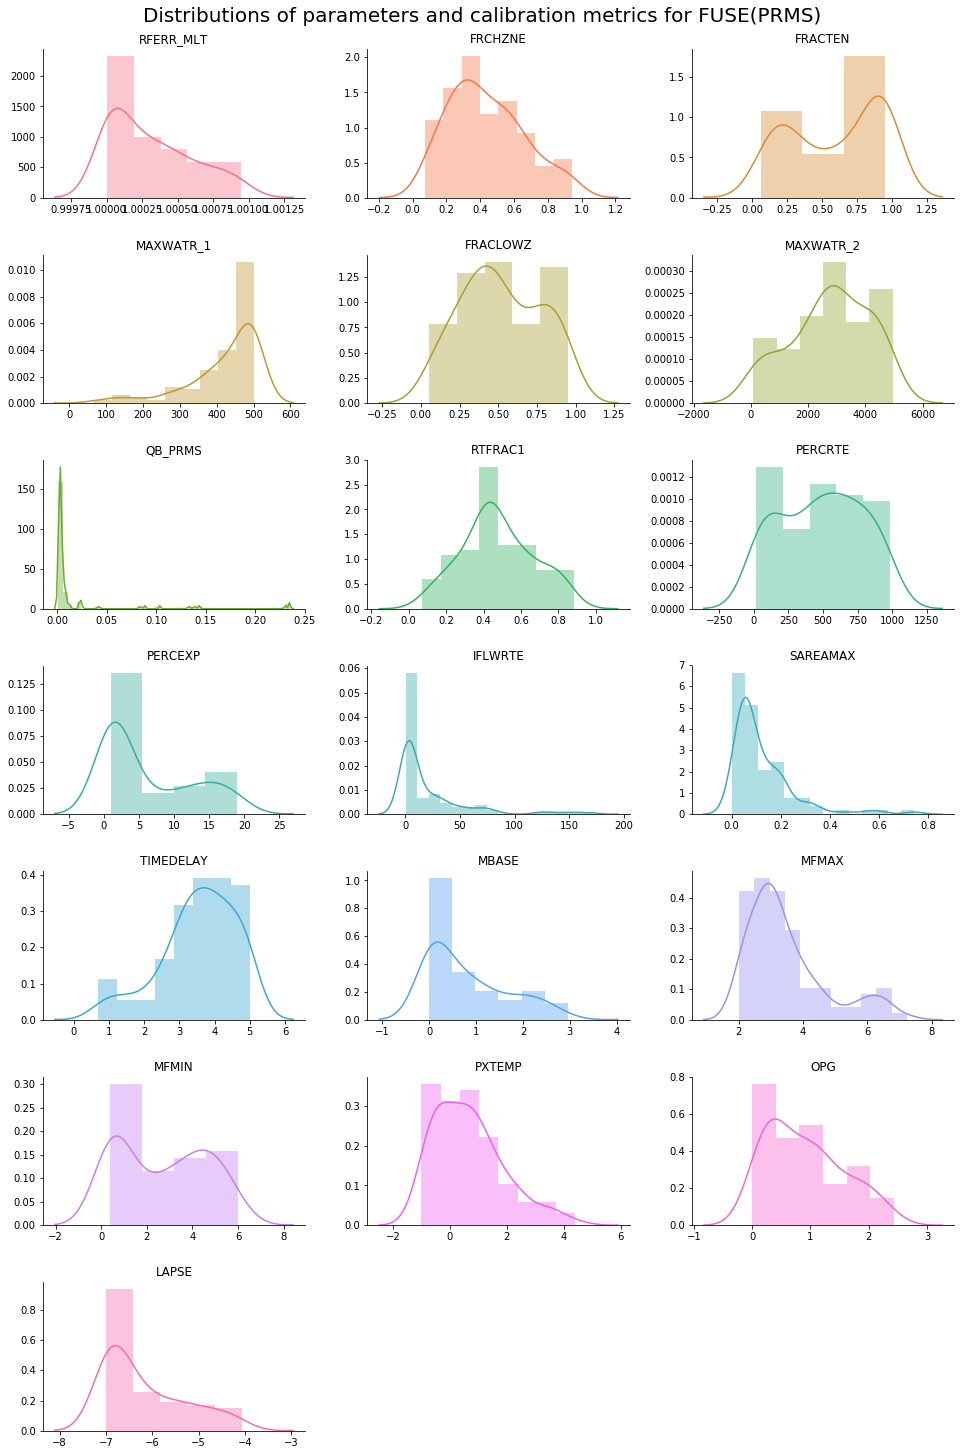

In [29]:
pardat = parExtract(prmsparam, prmsparlist) 
parstat= pardat.describe() #Descriptive statistics
parstat.to_csv('output/prmsstats_trunc.csv') 

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=prmsparlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, prmsparlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE(PRMS)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE - HECHMS

        RFERR_MLT     FRACTEN   MAXWATR_1    MAXWATR_2     QB_PRMS  \
count  100.000000  100.000000  100.000000   100.000000  100.000000   
mean     1.000040    0.949099  499.592468  2459.769043    0.002430   
std      0.000044    0.001317    0.515565  1383.055298    0.000189   
min      1.000000    0.939353  496.043701   159.537415    0.001812   
25%      1.000012    0.948994  499.436172  1193.543884    0.002316   
50%      1.000027    0.949362  499.775436  2393.712891    0.002414   
75%      1.000051    0.949722  499.884727  3438.907166    0.002589   
max      1.000242    0.949998  499.996826  4973.623047    0.002804   

          PERCRTE     PERCEXP    AXV_BEXP   TIMEDELAY       MBASE       MFMAX  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean   302.412262   11.977701    0.068261    4.632547    0.038011    2.983310   
std    253.348602    4.135209    0.003467    0.349715    0.102107    0.195651   
min     36.649971    5.160930    0.061437    

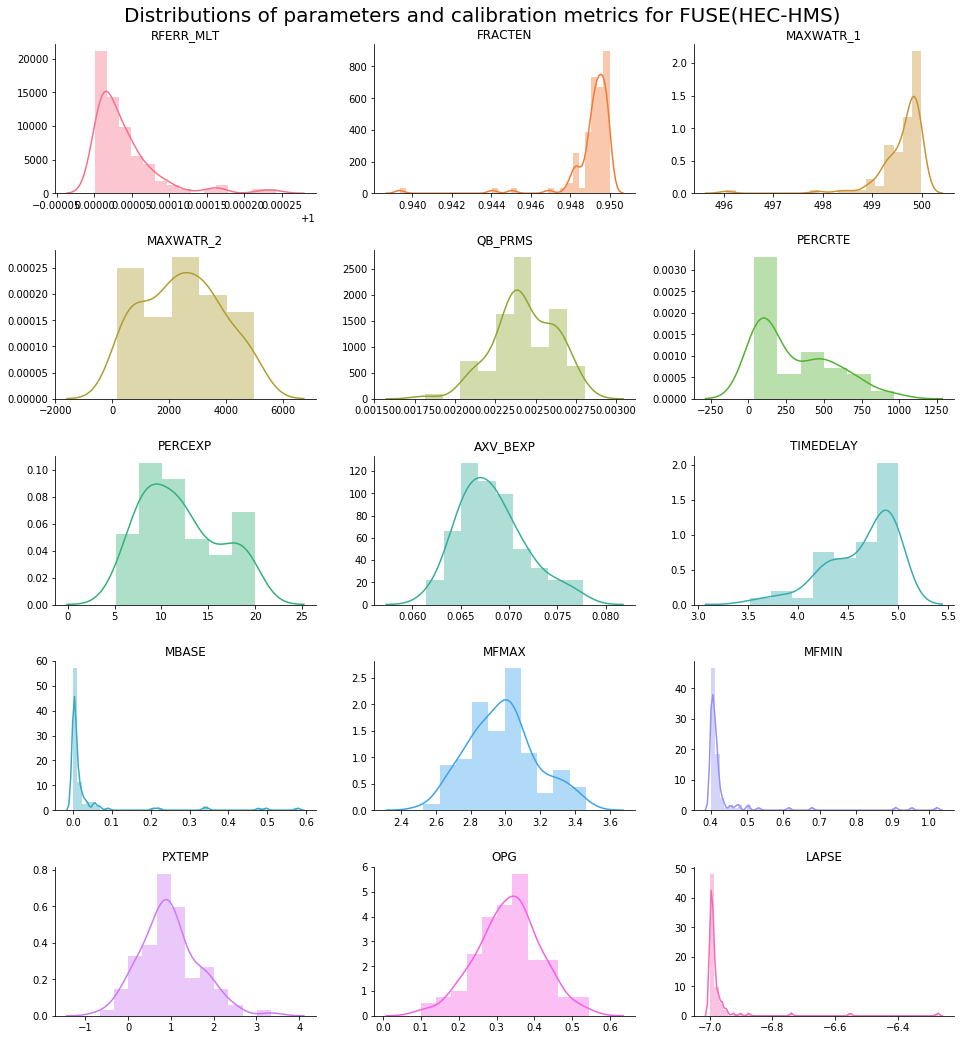

In [30]:
pardat = parExtract(hechmsparam, hechmsparlist) 
parstat= pardat.describe() #Descriptive statistics
parstat.to_csv('output/hechmsstats_trunc.csv') 

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=hechmsparlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, hechmsparlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE(HEC-HMS)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE (VIC)

        RFERR_MLT     FRACTEN   MAXWATR_1    MAXWATR_2     BASERTE  \
count  100.000000  100.000000  100.000000   100.000000  100.000000   
mean     1.000351    0.075243  451.245026  4744.748535   49.064224   
std      0.000300    0.041067   51.124428   222.563156   29.047831   
min      1.000001    0.050023  301.631287  3839.195068    2.120637   
25%      1.000095    0.051167  414.177795  4659.370972   33.469740   
50%      1.000312    0.056228  470.027512  4790.307617   43.453661   
75%      1.000563    0.082006  495.477844  4887.925293   63.685369   
max      1.000956    0.240053  499.965210  4999.893066  173.234009   

          QB_POWR     RTFRAC1     PERCRTE     PERCEXP    AXV_BEXP   TIMEDELAY  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     5.425796    0.944999  194.712036    5.351506    0.256848    4.421973   
std      1.608841    0.008465  276.675873    3.870917    0.051807    0.451554   
min      1.623092    0.892097    4.694458    

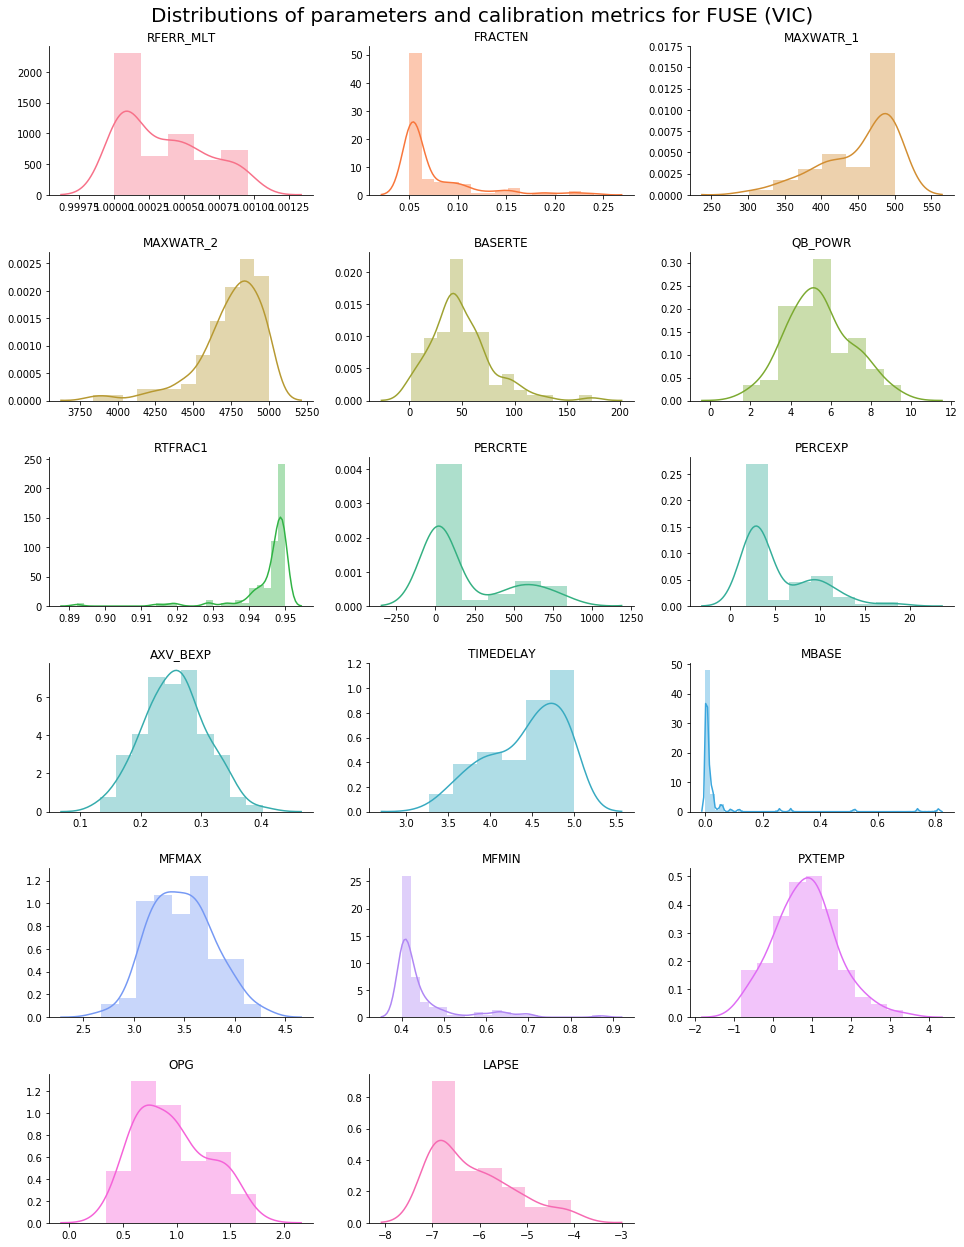

In [31]:
pardat = parExtract(vicparam, vicparlist) 
parstat= pardat.describe() #Descriptive statistics
parstat.to_csv('output/vicstats_trunc.csv') 

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=vicparlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, vicparlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE (VIC)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE(SAC-SMA)

        RFERR_MLT     FRACTEN   MAXWATR_1    PERCFRAC     FPRIMQB  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     1.000508    0.371388  459.568359    0.469212    0.512788   
std      0.000327    0.101991   53.460892    0.207939    0.161114   
min      1.000016    0.160145  189.884460    0.051859    0.160955   
25%      1.000196    0.286966  448.830780    0.315624    0.365876   
50%      1.000552    0.374029  478.498322    0.461540    0.542928   
75%      1.000774    0.443093  494.339607    0.646003    0.633830   
max      1.000987    0.705195  499.992554    0.802018    0.865220   

         MAXWATR_2   QBRATE_2A   QBRATE_2B     SACPMLT     SACPEXP  \
count   100.000000  100.000000  100.000000  100.000000  100.000000   
mean   2597.327881    0.001877    0.001973  234.634415    3.806643   
std     766.809509    0.000359    0.000390   23.076178    1.023874   
min    1186.073364    0.001014    0.001081  138.162872    1.335584   
25%    1927.651733    0.0016

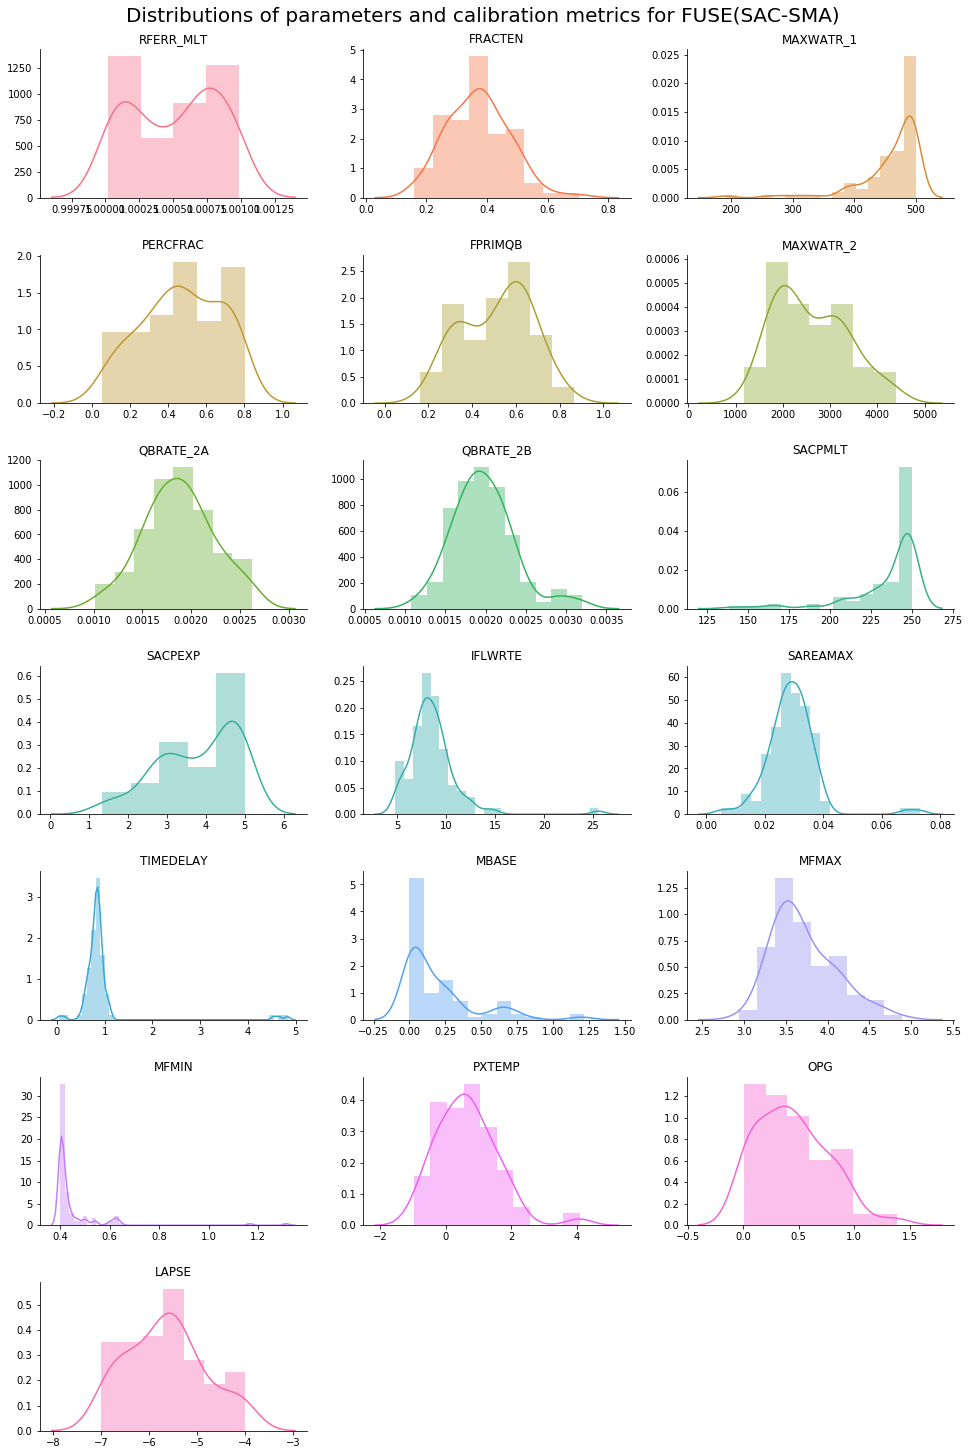

In [32]:
pardat = parExtract(sacsmaparam, sacsmaparlist) 
parstat= pardat.describe() #Descriptive statistics
parstat.to_csv('output/sacsmastats_trunc.csv') 

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=sacsmaparlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, sacsmaparlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE(SAC-SMA)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# Plots of all fields in the parameter file (For further diagnosis)

# FUSE(PRMS)

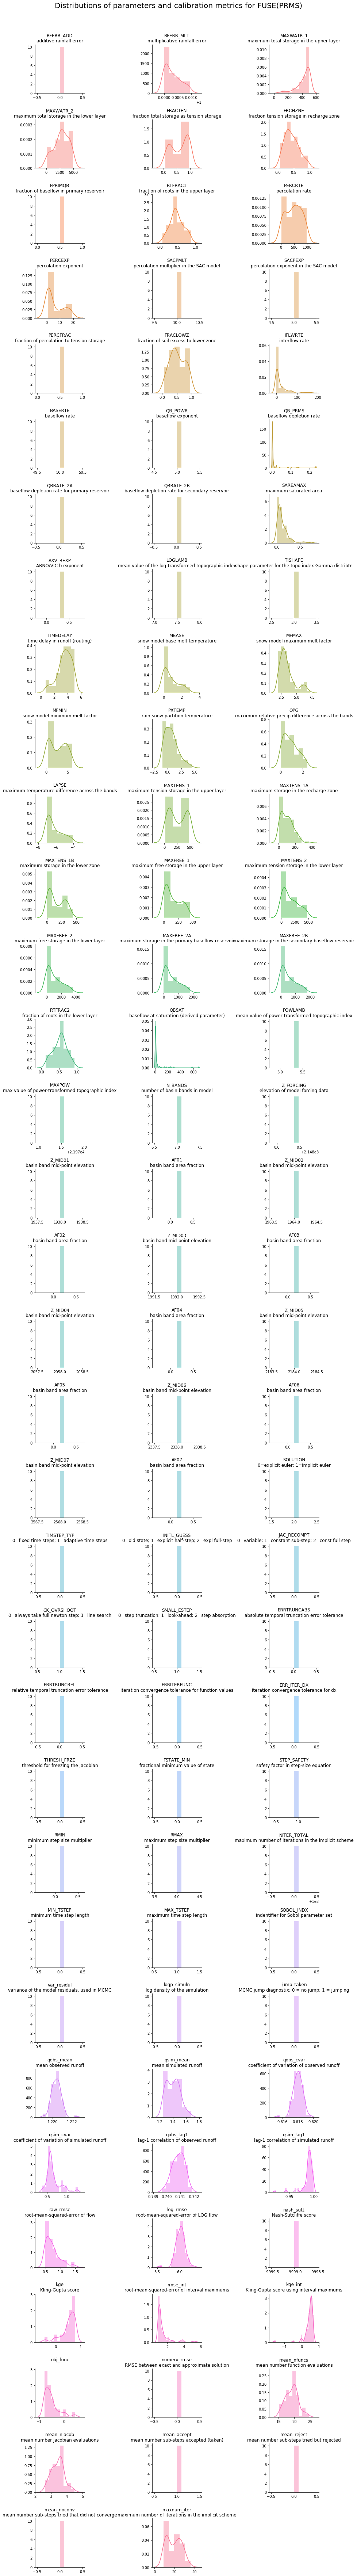

In [33]:
pardat = parExtract(prmsparam, parlist) 
parstat=pardat.describe() #Descriptive statistics
parstat.to_csv('output/prmsstats.csv')

pardat = pd.melt(pardat)  #tidy

# PLOT
g = sns.FacetGrid(pardat, col="variable", col_order=parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, pardesc, in zip(g.axes.flat, parlist, pardesclist):
    ax.set_title(parname + "\n" +pardesc)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE(PRMS)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE (HEC-HMS)

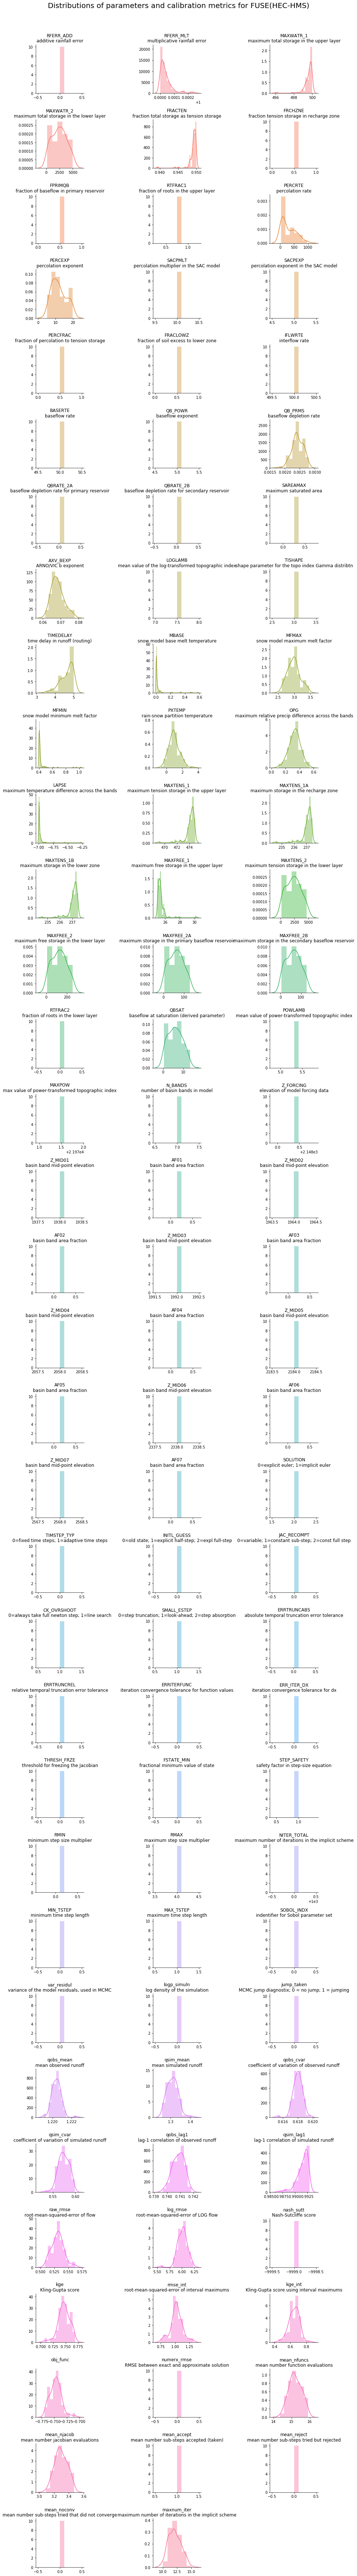

In [34]:
pardat = parExtract(hechmsparam, parlist) 
parstat=pardat.describe() #Descriptive statistics
parstat.to_csv('output/hechmsstats.csv')

pardat = pd.melt(pardat)  

g = sns.FacetGrid(pardat, col="variable", col_order=parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, pardesc, in zip(g.axes.flat, parlist, pardesclist):
    ax.set_title(parname + "\n" +pardesc)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE(HEC-HMS)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE (VIC)

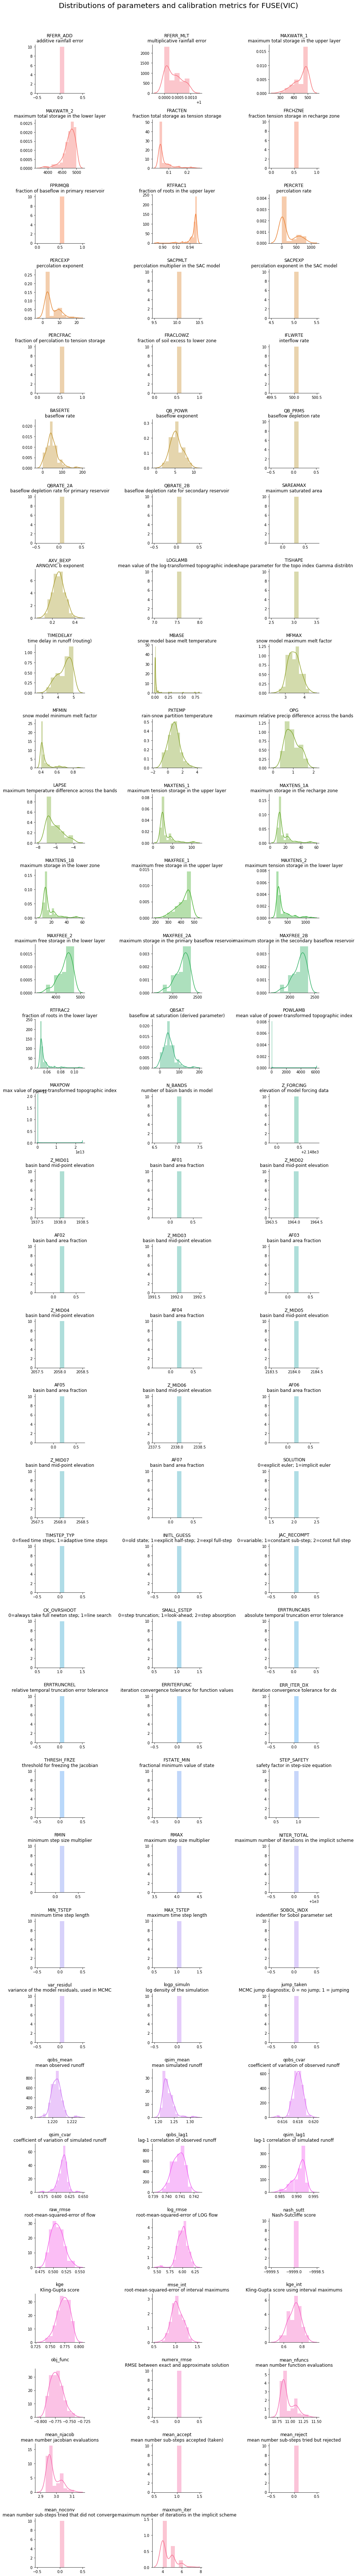

In [35]:
pardat = parExtract(vicparam, parlist) 
parstat=pardat.describe() #Descriptive statistics
parstat.to_csv('output/vicstats.csv')

pardat = pd.melt(pardat)  #tidy

g = sns.FacetGrid(pardat, col="variable", col_order=parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, pardesc, in zip(g.axes.flat, parlist, pardesclist):
    ax.set_title(parname + "\n" +pardesc)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE(VIC)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE (SAC-SMA)

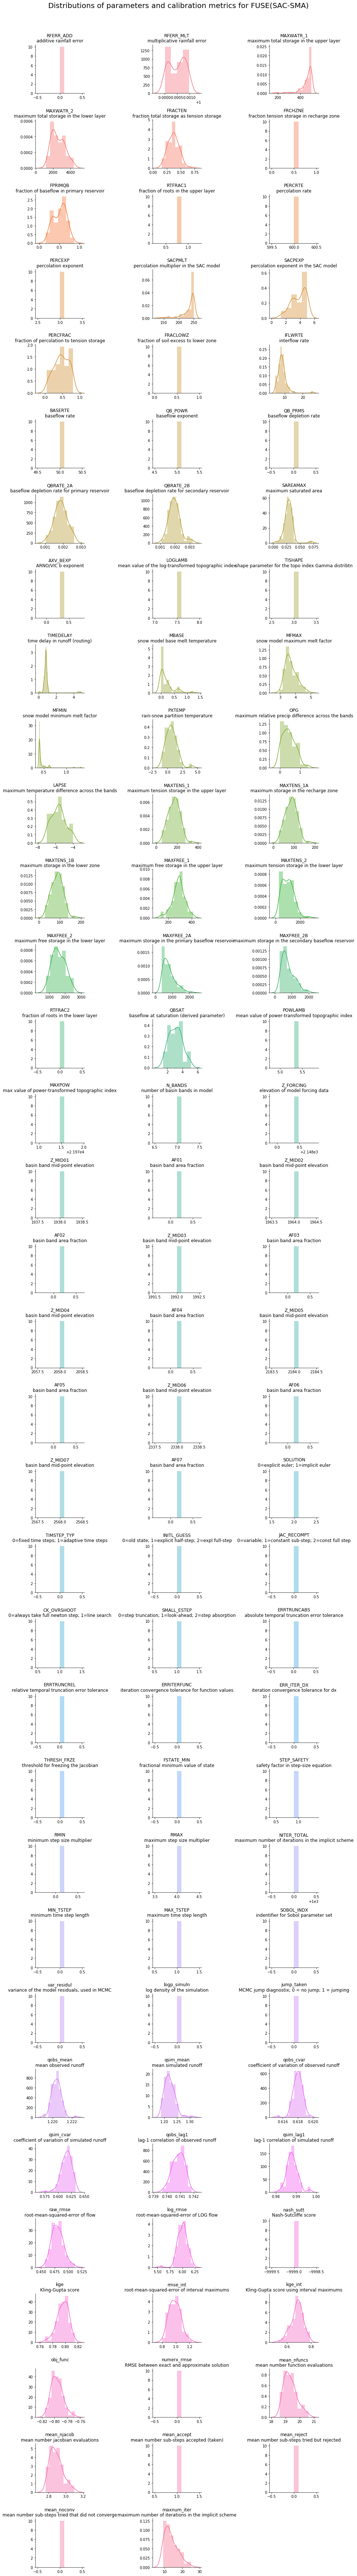

In [36]:
pardat = parExtract(sacsmaparam, parlist) 
parstat=pardat.describe() #Descriptive statistics
parstat.to_csv('output/sacsmastats.csv')

pardat = pd.melt(pardat)  #tidy

g = sns.FacetGrid(pardat, col="variable", col_order=parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, pardesc, in zip(g.axes.flat, parlist, pardesclist):
    ax.set_title(parname + "\n" +pardesc)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE(SAC-SMA)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()